In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from matplotlib.ticker import MaxNLocator
import pandas as pd
import glob
from sklearn.metrics import roc_auc_score
import seaborn as sns
import numpy as np
from average_decision_ordering import calc_ado
import warnings
import matplotlib
import shutil
import matplotlib.image as image
from os import path, getcwd
warnings.simplefilter(action="ignore", category=FutureWarning)
np.seterr(divide="ignore")
import pathlib

home = pathlib.Path.cwd().parent
data_dir = path.join(home, "data")
efp_dir = path.join(data_dir, "efp") 
graph_dir = path.join(home, "graphs")

font = {'family' : 'serif',
        'size'   : 13}

matplotlib.rc('font', **font)

# Produce stats table for run

In [2]:
def stats_table(run_name, passes):
    print(run_name)
    it_dir = f"runs/{run_name}"
    df = pd.read_csv(f"{it_dir}/selected_efps.csv", index_col=0)
    if len(df) < passes:
        passes = len(df)
    for pass_ix in range(passes):
#         table = pd.DataFrame()
        if pass_ix >= 1:
            pass_df = df.iloc[pass_ix]
            iteration = int(pass_ix)
            efp = pass_df.efp
            efp_data = pd.read_feather(f"{efp_dir}/{efp}.feather")
            yhat = pd.read_feather(f"{it_dir}/p{pass_ix}/test_pred.feather")
            test_pred = pd.read_feather(f"{it_dir}/p{pass_ix}/test_pred.feather")
#             auc_efp = roc_auc_score(efp_data.targets.values, efp_data.nnify.values)
            ado_w_ll = calc_ado(test_pred.hl.values, test_pred.ll.values, test_pred.y.values, 100000)
            deets = efp.split("_")
            et_ht = deets[0]
            graph = "$\gPlot{0.05}{efp_%s_%s_%s}$" %(deets[1], deets[2], deets[3])
            kappa = deets[5]
            beta = deets[-1]
            AUC_hln = pass_df.auc
            ADO_xn_1 = pass_df.ado
#             table_ix = pd.DataFrame({"Iteration":iteration, "EFP":graph, "$\kappa$":kappa, "$\beta$":beta,
#                                   "$\text{ADO}[\text{EFP}, \text{CNN}]_{X_{n-1}}$":ADO_xn_1, "AUC[EFP]":auc_efp, 
#                                   "$\text{ADO}[\text{HLN}_n,\text{CNN}]_{X_{\rm all}}$":ado_w_ll, "$\text{AUC}[\textrm{HLN}_n]$":AUC_hln},
#                                 index=[pass_ix])
#             table = pd.concat([table, table_ix])
            print(f"{iteration} & {graph} & {kappa} & {beta} & {ADO_xn_1:.4} & {ado_w_ll:.4} & {AUC_hln:.4}\\\\")

run_names = ['run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones']
for run_name in run_names:
    stats_table(run_name=run_name, passes=11)

run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones
1 & $\gPlot{0.05}{efp_3_3_1}$ & 1 & 1 & 0.7261 & 0.903 & 0.8128\\
2 & $\gPlot{0.05}{efp_3_5_1}$ & 1 & 2 & 0.5425 & 0.9069 & 0.8171\\
3 & $\gPlot{0.05}{efp_3_7_6}$ & 1 & 2 & 0.5527 & 0.9106 & 0.8187\\
4 & $\gPlot{0.05}{efp_3_7_5}$ & 1 & 2 & 0.5157 & 0.9111 & 0.8203\\
5 & $\gPlot{0.05}{efp_2_1_0}$ & 1 & 2 & 0.5161 & 0.9144 & 0.8208\\
6 & $\gPlot{0.05}{efp_3_6_4}$ & 1 & 2 & 0.5116 & 0.9139 & 0.8216\\
7 & $\gPlot{0.05}{efp_3_5_3}$ & 1 & 2 & 0.5539 & 0.9151 & 0.8225\\
8 & $\gPlot{0.05}{efp_2_1_0}$ & 1 & 1 & 0.5749 & 0.9157 & 0.8225\\
9 & $\gPlot{0.05}{efp_3_5_2}$ & 1 & 2 & 0.5531 & 0.9195 & 0.8242\\
10 & $\gPlot{0.05}{efp_3_2_0}$ & 1 & 2 & 0.5128 & 0.9181 & 0.8239\\


# Plot sig/bkg histograms for EFPs

run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones 0
efp_3_3_1_k_1_b_1
/media/green/Dropbox/Projects/muon-id/guided-iteration/figures/run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones


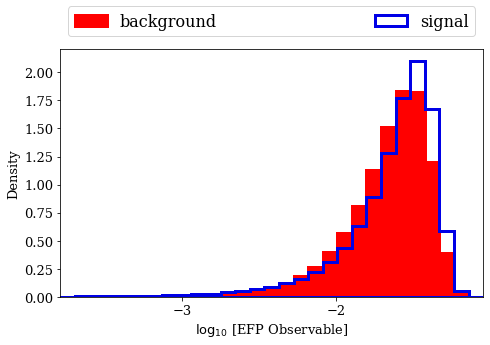

run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones 1
efp_3_5_1_k_1_b_2
/media/green/Dropbox/Projects/muon-id/guided-iteration/figures/run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones


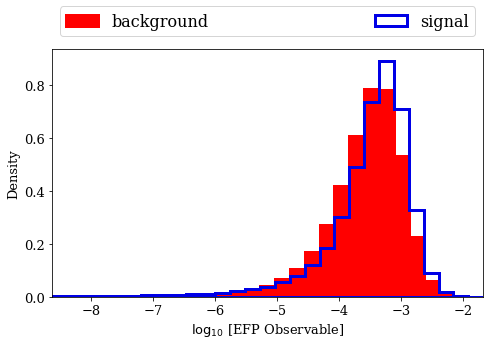

run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones 2
efp_3_7_6_k_1_b_2
/media/green/Dropbox/Projects/muon-id/guided-iteration/figures/run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones


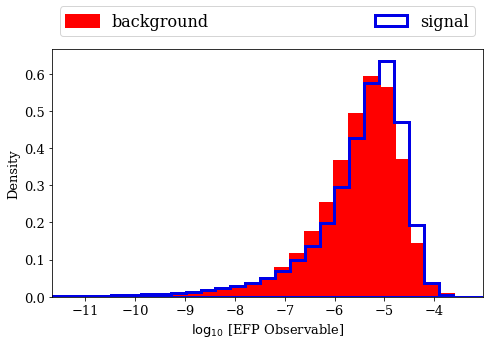

run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones 3
efp_3_7_5_k_1_b_2
/media/green/Dropbox/Projects/muon-id/guided-iteration/figures/run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones


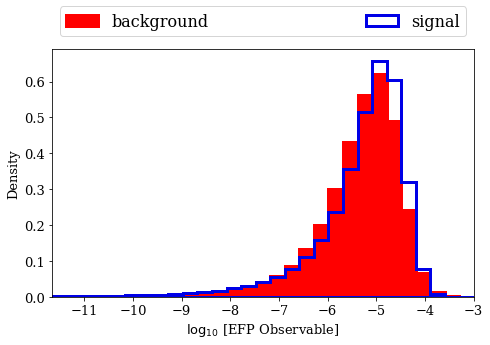

run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones 4
efp_2_1_0_k_1_b_2
/media/green/Dropbox/Projects/muon-id/guided-iteration/figures/run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones


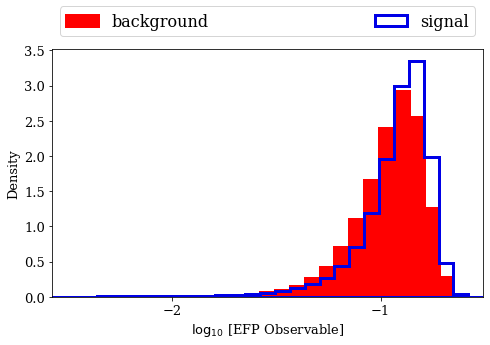

run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones 5
efp_3_6_4_k_1_b_2
/media/green/Dropbox/Projects/muon-id/guided-iteration/figures/run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones


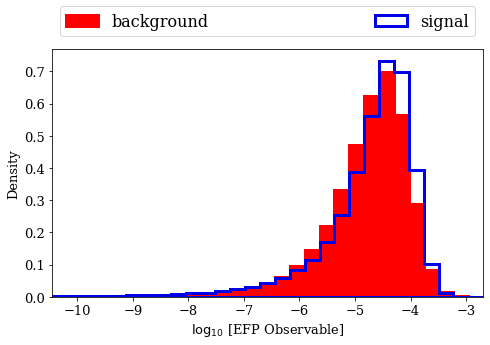

run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones 6
efp_3_5_3_k_1_b_2
/media/green/Dropbox/Projects/muon-id/guided-iteration/figures/run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones


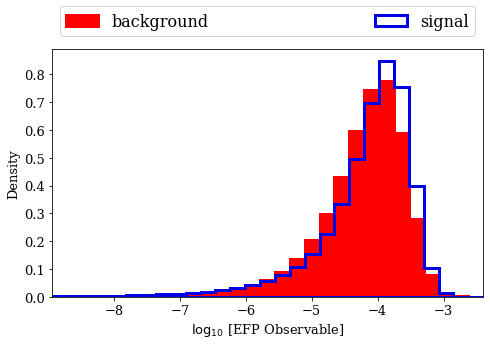

run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones 7
efp_2_1_0_k_1_b_1
/media/green/Dropbox/Projects/muon-id/guided-iteration/figures/run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones


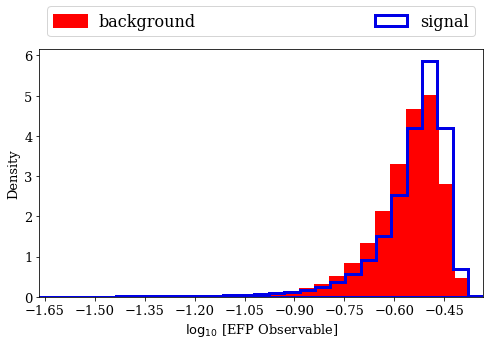

run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones 8
efp_3_5_2_k_1_b_2
/media/green/Dropbox/Projects/muon-id/guided-iteration/figures/run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones


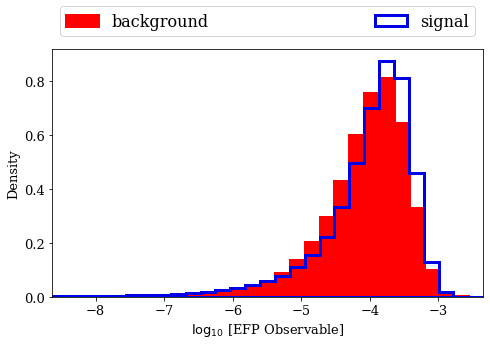

run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones 9
efp_3_2_0_k_1_b_2
/media/green/Dropbox/Projects/muon-id/guided-iteration/figures/run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones


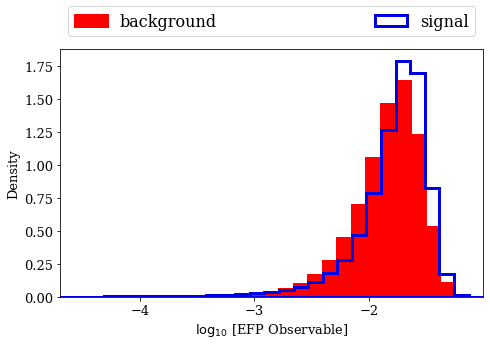

In [3]:
import os

def dif_hist_plot(run_name, pass_ix):
    print(run_name, pass_ix)
    it_dir = f"runs/{run_name}"
    yhat = pd.read_feather(f"{it_dir}/p{pass_ix}/test_pred.feather")
    test_pred = pd.read_feather(f"{it_dir}/p{pass_ix}/test_pred.feather")
    
    # Get indices for run
    df = pd.read_feather(f"{it_dir}/p{pass_ix}/dif_order.feather")
    idx0 = df.idx0.values
    idx1 = df.idx1.values

    # Plot settings
    n_bins = 30
    lw = 3

    e0 = (1, 0, 0, 1)
    c0 = (1, 0, 0, 1)
    
    e1 = (0, 0, 0.9, 1)
    c1 = (0, 0, 0.9, 0)


    fig_x = 7
    fig_y = 5
    alpha = 0.1

    # Initialize plot
    fig, ax = plt.subplots(1, figsize=(fig_x, fig_y))

    # Load EFP data from run
    efp_max = (
        pd.read_csv(f"{it_dir}/p{pass_ix}/dif_order_ado_comparison.csv")
        .iloc[0]
        .efp
    )    
    print(efp_max)
    efp_data = pd.read_feather(f"{efp_dir}/{efp_max}.feather")
    
    
    full_hist, full_edges = np.histogram(np.log10(efp_data.features.values), bins=np.linspace(-15,15,100), density=True)
    for ix in range(len(full_hist)):
        hist_count = full_hist[ix]
        if hist_count > 0.001:
            lower_bound = full_edges[ix]
            break
    
    # Get complete EFP and group by signal/background
    efp_grp = efp_data.groupby(["targets"])
    if "efp_1_0_0" in efp_max:
        X0 = efp_grp.get_group(0).features.values
        X1 = efp_grp.get_group(1).features.values
        lower_bound = 0
    else:
        X0 = np.log10(efp_grp.get_group(0).features.values)
        X1 = np.log10(efp_grp.get_group(1).features.values)

    upper_bound = max(max(X0), max(X1))
    bins = np.linspace(lower_bound, upper_bound, n_bins)

    ax.hist(
        X0,
        bins=bins,
        density=True,
        label="background",
        histtype="stepfilled",
        linestyle="-",
        linewidth=lw,
        edgecolor=e0,
        fc=c0,
    )    

    # Plot histograms
    ax.hist(
        X1,
        bins=bins,
        density=True,
        label="signal",
        histtype="stepfilled",
        linestyle="-",
        linewidth=lw,
        edgecolor=e1,
        fc=c1,
    )
    

    # Increase font
    ax.legend(fontsize=16, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand")

    # Plot labels
    if "efp_1_0_0" in efp_max:
        ax.set_xlabel("EFP Observable")
        ax.set_xlim(left=0, right=upper_bound)
    else:
        ax.set_xlabel("$\log_{10}$ [EFP Observable]")
        ax.set_xlim(left=lower_bound, right=upper_bound)
    ax.set_ylabel("Density")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Save plot
    plt.tight_layout()
    fig_path = f"{home}/guided-iteration/figures/{run_name}"
    print(fig_path)
    pass_path = f"{fig_path}/pass{pass_ix+1}"
    if not os.path.exists(fig_path):
        os.mkdir(fig_path)
    if not os.path.exists(pass_path):
        os.mkdir(pass_path)
        
    plt.savefig(f"{home}/guided-iteration/figures/{run_name}/pass{pass_ix+1}/hist.pdf")
    efp_filename = efp_max.split("_k_")[0]
    shutil.copy(f"{home}/figures/ndk/{efp_filename}.pdf", f"{home}/guided-iteration/figures/{run_name}/pass{pass_ix+1}/{efp_filename}.pdf")
    plt.show()

    
run_names = ['run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones']
for run_name in run_names:
    for pass_ix in range(0,10):
        dif_hist_plot(run_name, pass_ix)


# Bootstrap stats

In [9]:
run_names = ["run-hl-pt-ircSafe"]
for run_name in run_names:
    bs_results = pd.read_csv(home / "guided-iteration" / "runs" / run_name / "bootstrap_results.csv", index_col=0).auc.values
    tex_out = "%s & %0.4f $\pm$ %0.4f" %(run_name, np.mean(bs_results), np.std(bs_results))
    print(tex_out)
    

FileNotFoundError: [Errno 2] No such file or directory: '/home/tfaucett/Dropbox/Projects/muon-id/guided-iteration/runs/run-hl-pt-ircSafe/bootstrap_results.csv'